# Bank Marketing

In this project my goal was to implement a simple workflow that will assess the similarity between bank customers and suggest for any input customer a list of his/her 10 most similar other customers by printing their CustomerID numbers, in other words index numbers in dataset.

After that, I implemented a Deep Learning algorithm to predict if a customer has subscribed a term deposit? (binary: 'yes','no') 

The dataset I used is publicly available and can be found in this UCI Machine Learning Repository webpage; [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  I used "bank-additional-full.csv" dataset for this project. However, I used Google Colaboratory platform instead of my own CPU. 

This dataset was created by Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) at 2012 and subjected to paper published as
__" S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology."__ The paper also can be found in this [link](http://repositorium.sdum.uminho.pt/handle/1822/14838).

---

> Burcin Sarac <br />

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur',' housemaid', 'management', 'retired', 'self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate' ,'professional.course', 'university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent' ,'success')
## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data preperation

In [0]:
import numpy as np
import pandas as pd

from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix
import heapq



In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']), sep=";")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
for column in data:
    if is_string_dtype(data[column])==True:
        print(data[column].name ,"column unique values : ", data[column].unique())

job column unique values :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital column unique values :  ['married' 'single' 'divorced' 'unknown']
education column unique values :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default column unique values :  ['no' 'unknown' 'yes']
housing column unique values :  ['no' 'yes' 'unknown']
loan column unique values :  ['no' 'yes' 'unknown']
contact column unique values :  ['telephone' 'cellular']
month column unique values :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week column unique values :  ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome column unique values :  ['nonexistent' 'failure' 'success']
y column unique values :  ['no' 'yes']


In [0]:
    data.y = data.y.apply(lambda x: 0 if x == 'no' else 1)

In [8]:
for col in data.columns:
  print("unknown data amount in",col, ":", data[col][data[col]=="unknown"].count())

unknown data amount in age : 0
unknown data amount in job : 330
unknown data amount in marital : 80
unknown data amount in education : 1731
unknown data amount in default : 8597
unknown data amount in housing : 990
unknown data amount in loan : 990
unknown data amount in contact : 0
unknown data amount in month : 0
unknown data amount in day_of_week : 0
unknown data amount in duration : 0
unknown data amount in campaign : 0
unknown data amount in pdays : 0
unknown data amount in previous : 0
unknown data amount in poutcome : 0
unknown data amount in emp.var.rate : 0
unknown data amount in cons.price.idx : 0
unknown data amount in cons.conf.idx : 0
unknown data amount in euribor3m : 0
unknown data amount in nr.employed : 0
unknown data amount in y : 0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


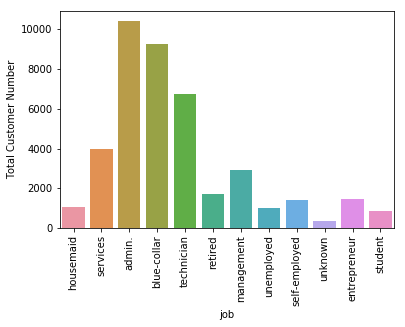

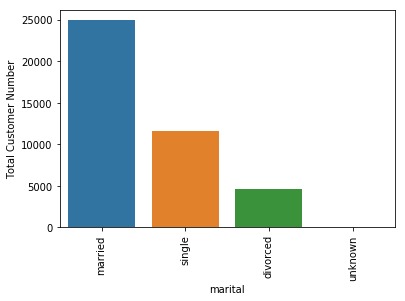

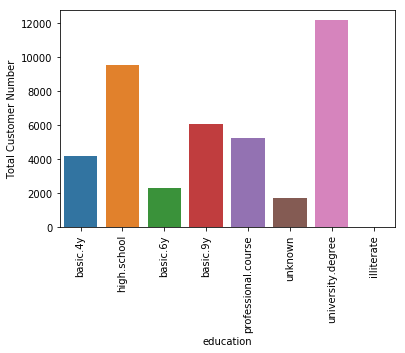

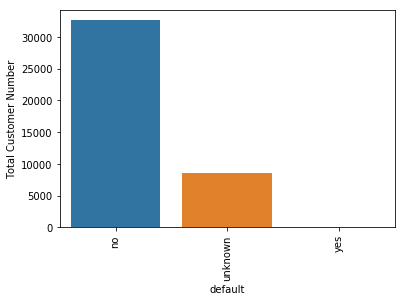

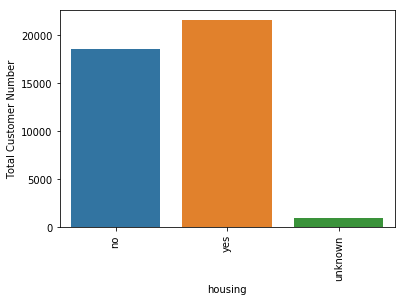

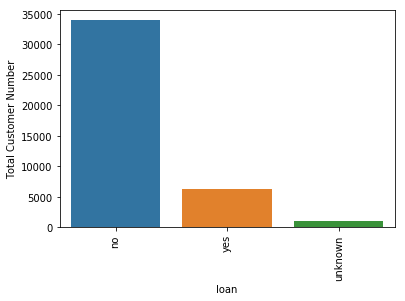

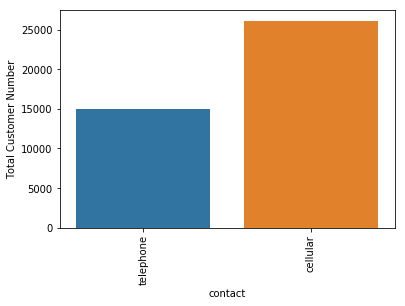

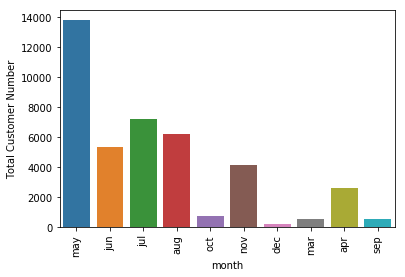

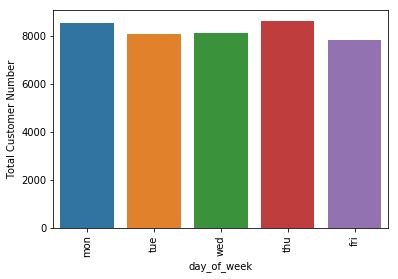

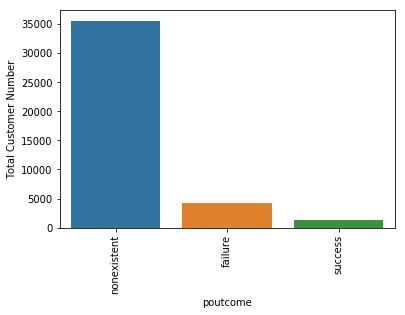

In [9]:
for column in data:
    if is_string_dtype(data[column])==True:
      sns.countplot(column, data=data)
      plt.xlabel(column)
      plt.xticks(rotation=90)
      plt.ylabel("Total Customer Number")
      plt.show()

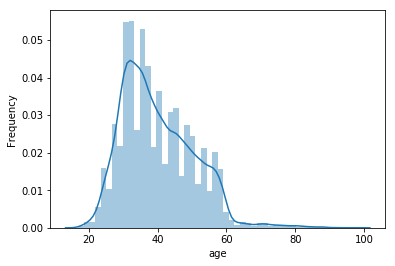

In [41]:
sns.distplot(data.age)
plt.ylabel("Frequency")
plt.show()

At this stage, I did not plan to drop or deal with any infuencer points (outliers) or unknown data. Because since it is a Bank dataset, it may put on purpose to see if that informations missing, what will be the effect on target variable. So I jump to finding similarity between customers part. 


## Finding Similarity between customers


Since I planned to find similar customers I only used customer data among columns, which are age, job, marital, education, default, housing, loan attributes of dataset. 

In [0]:
dataforsim = data.iloc[:,0:7]

In [86]:
dataforsim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
age          41188 non-null int64
job          41188 non-null object
marital      41188 non-null object
education    41188 non-null object
default      41188 non-null object
housing      41188 non-null object
loan         41188 non-null object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [0]:
for column in dataforsim:
    if is_string_dtype(dataforsim[column])==True:
        one_hot = pd.get_dummies(dataforsim[column], prefix= column)
        dataforsim = dataforsim.drop(column,axis = 1)
        dataforsim = dataforsim.join(one_hot)

In [88]:
for column in dataforsim:
    if is_numeric_dtype(dataforsim[column])==True:
        print(dataforsim[column].name ,"column max and min values : ", dataforsim[column].max(), "and", dataforsim[column].min())

age column max and min values :  98 and 17
job_admin. column max and min values :  1 and 0
job_blue-collar column max and min values :  1 and 0
job_entrepreneur column max and min values :  1 and 0
job_housemaid column max and min values :  1 and 0
job_management column max and min values :  1 and 0
job_retired column max and min values :  1 and 0
job_self-employed column max and min values :  1 and 0
job_services column max and min values :  1 and 0
job_student column max and min values :  1 and 0
job_technician column max and min values :  1 and 0
job_unemployed column max and min values :  1 and 0
job_unknown column max and min values :  1 and 0
marital_divorced column max and min values :  1 and 0
marital_married column max and min values :  1 and 0
marital_single column max and min values :  1 and 0
marital_unknown column max and min values :  1 and 0
education_basic.4y column max and min values :  1 and 0
education_basic.6y column max and min values :  1 and 0
education_basic.9y 

In [0]:
def normalizecol(x) :
    x = round((x-min(x))/(max(x)-min(x)),2)
    return(x)

In [0]:
dataforsim.age = normalizecol(data.age)

After all, my data became ready to analyse. So I used ````distance_matrix()```` command from 'scipy.spatial' package. It returns the matrix of all pair-wise distances. It requires parameter x and y, so I determined x as the entire dataframe and y as the input customer_ID. Because it might resulted with memory error if I tried to create a distance matrix one by one for all customers at the same time. 

And after creating distance matrix only for customer 1230 as an example, then I pushed matrix into an array. And then by using for loop I added their index numbers again into the created array. So after this process, I got an array which includes distance to the customer 1230 and customer_ID numbers correspond to their distance metrics one by one.

At last, I used 'heapq' package to sort array and find the smallest 10 neighbors of customer 1230 by using ````heapq.nsmallest()```` command. I wrote 11 inside that command instead of 10, because otherwise one of 10 determined customers will be 1230 as closest distance with value 0.

In [0]:
d1230 = distance_matrix(dataforsim,dataforsim[dataforsim.index==1230])

In [0]:
d1230 = [(v,i) for i,v in enumerate(d1230)]

In [93]:
heapq.nsmallest(11, (d1230))

[(array([0.]), 1230),
 (array([0.01]), 5159),
 (array([0.01]), 7768),
 (array([0.01]), 30895),
 (array([0.02]), 4180),
 (array([0.02]), 22093),
 (array([0.03]), 9954),
 (array([0.03]), 10010),
 (array([0.03]), 16933),
 (array([0.03]), 6214),
 (array([0.03]), 6456)]

I also manually compared customer 1230 with randomly selected one of printed customers above by printing both two of them below.

In [94]:
dataforsim[dataforsim.index==1230]

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
1230,0.38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [95]:
dataforsim[dataforsim.index==5159]

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
5159,0.37,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


 It seems that my command works clearly, because both customers have totally same attributes. So I can automate this process by defining a function. Wİth the helps of determined commands above, I created a function named ````closest()````, which will allow me to find closest 10 customers by writing only customer id numbers into the function. And then with the helps of a for loop, I printed all randomly selected  1230, 3655, 4988, 12153, 22257, 25884, 32345, 39555  customers' closest 10 neighbors below. 

In [0]:
def closest(x):
    print("The most similar 10 customers of customer ID:", x,"are listed below with their customer ID numbers;")
    d = distance_matrix(dataforsim,dataforsim[dataforsim.index==x])
    d = [(v,j) for j,v in enumerate(d)]
    for i in range(0, 11):
        if heapq.nsmallest(11, (d))[i][1]!=x:
            print(heapq.nsmallest(11, (d))[i][1])

In [97]:
for i in (1230, 3655, 4988, 12153, 22257, 25884, 32345, 39555):
    closest(i)

The most similar 10 customers of customer ID: 1230 are listed below with their customer ID numbers;
5159
7768
30895
4180
22093
9954
10010
16933
6214
6456
The most similar 10 customers of customer ID: 3655 are listed below with their customer ID numbers;
63
6000
6918
9836
10776
11492
12852
12853
12884
13054
The most similar 10 customers of customer ID: 4988 are listed below with their customer ID numbers;
549
1815
11462
81
3198
33056
6292
7096
20701
11906
The most similar 10 customers of customer ID: 12153 are listed below with their customer ID numbers;
5928
15093
16598
18156
18893
20155
20391
21385
23061
25316
The most similar 10 customers of customer ID: 22257 are listed below with their customer ID numbers;
22073
2565
2587
4636
4851
6049
7447
11634
13255
22690
The most similar 10 customers of customer ID: 25884 are listed below with their customer ID numbers;
24163
25502
15462
2816
5191
6970
7460
10628
24585
24586
The most similar 10 customers of customer ID: 32345 are listed below 

## Prediction

This time, I turned back to my whole dataset and convert all categorical variables into dummies. But first, as suggested I dropped "duration" column, which can also be observed from the correlation ratios below. 




In [0]:
data.drop(["duration"], axis = 1, inplace = True)

In [0]:
for column in data:
    if is_string_dtype(data[column])==True:
        one_hot = pd.get_dummies(data[column], prefix= column)
        data = data.drop(column,axis = 1)
        data = data.join(one_hot)

I also need to notmalize numeric variables. To achieve this, I again use ````normalizecol()```` function that I created at the finding similarity part above. And I also checked the correlation between created dummy columns and target variable. 

In [21]:
for column in data:
    if is_numeric_dtype(data[column])==True and data[column].max()>1:
        print(data[column].name ,"column max and min values : ", data[column].max(), "and", data[column].min())

age column max and min values :  98 and 17
campaign column max and min values :  56 and 1
pdays column max and min values :  999 and 0
previous column max and min values :  7 and 0
emp.var.rate column max and min values :  1.4 and -3.4
cons.price.idx column max and min values :  94.76700000000001 and 92.20100000000001
euribor3m column max and min values :  5.045 and 0.634
nr.employed column max and min values :  5228.1 and 4963.6


In [0]:
for col in ["age","campaign","previous", "emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed", "pdays"]:
  data[col] = normalizecol(data[col])

In [56]:
for col in data.drop(['y'],axis=1).columns :
    if (abs(data.y.corr(data[col]))>0.1):
        print('Correlation btw Term Deposit vs',col, ':', round(data.y.corr(data[col]),2))

Correlation btw Term Deposit vs pdays : -0.32
Correlation btw Term Deposit vs previous : 0.23
Correlation btw Term Deposit vs emp.var.rate : -0.3
Correlation btw Term Deposit vs cons.price.idx : -0.14
Correlation btw Term Deposit vs euribor3m : -0.31
Correlation btw Term Deposit vs nr.employed : -0.35
Correlation btw Term Deposit vs contact_cellular : 0.14
Correlation btw Term Deposit vs contact_telephone : -0.14
Correlation btw Term Deposit vs month_mar : 0.14
Correlation btw Term Deposit vs month_may : -0.11
Correlation btw Term Deposit vs month_oct : 0.14
Correlation btw Term Deposit vs month_sep : 0.13
Correlation btw Term Deposit vs poutcome_nonexistent : -0.19
Correlation btw Term Deposit vs poutcome_success : 0.32


After this data preparation part, I splited data into train and test and then trained a Neural Network model from scratch and fit the model to the dataset for prediction. Since the target variable is binary(1 and 0), I used "sigmoid" activation function in my output layer and "binary_crossentropy" for my loss function. 

Firstly I created 3 hidden layer with 100 nodes and used stochastic gradient descent to determine loss function, however I realized afterwards that, the dataset is too good to be true. In other words by using given predictors, all algorithms can perfectly predict unseen data. So I deleted all hidden layers and kept only one with 20 nodes. And I also added dropout 50% rule to let the algorithm use only half of given nodes  in each iteration. But none of them was enough to make the model simplier. So I added some notes to the result and ended the project.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix


In [0]:
y = data.iloc[:,-1]

In [0]:
X = data.drop(["y"], axis=1)

In [60]:
X.shape

(41188, 62)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
dropout_rate = 0.5
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()



In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
model.fit(
    X_train,                     
    y_train,                      
    epochs= 10,              
    batch_size= 10
)

Epoch 1/10
28831/28831 [==============================] - 5s 179us/step - loss: 0.0015 - acc: 0.9997
Epoch 2/10
28831/28831 [==============================] - 5s 175us/step - loss: 0.0011 - acc: 0.9998
Epoch 3/10
28831/28831 [==============================] - 5s 181us/step - loss: 0.0012 - acc: 0.9998
Epoch 4/10
28831/28831 [==============================] - 5s 171us/step - loss: 0.0020 - acc: 0.9997
Epoch 5/10
28831/28831 [==============================] - 5s 169us/step - loss: 0.0022 - acc: 0.9995
Epoch 6/10
28831/28831 [==============================] - 5s 170us/step - loss: 0.0025 - acc: 0.9997
Epoch 7/10
28831/28831 [==============================] - 5s 169us/step - loss: 0.0023 - acc: 0.9996
Epoch 8/10
28831/28831 [==============================] - 5s 170us/step - loss: 0.0022 - acc: 0.9996
Epoch 9/10
28831/28831 [==============================] - 5s 168us/step - loss: 0.0024 - acc: 0.9994
Epoch 10/10
28831/28831 [==============================] - 5s 168us/step - loss: 0.0027 - a

In [80]:
model.evaluate(X_train, y_train)

28831/28831 [==============================] - 1s 27us/step


[2.3964251876209654e-06, 1.0]

In [0]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [82]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11937     0]
 [    0   420]]


After this result, I tried to add dropout method, keep only one hidden layer and delete the remaining ones created in the first attempt. However it still perfectly predicts test data with 100% accuracy. Since it is unseen data, I could say it is a perfect model, but this won't be a realistic conclusion. 

Some possible approaches to prevent this overfitting problem might be; 
- decreasing feature numbers
- trying label encoding instead of one hot encoding
- decreasing layer node numbers or epoch numbers


But I won't going on for now. Because the main purpose of this project is to get hands on experience on Neural Networks.

Additionally, I added some classification algorithms to test if features are enough for perfect prediction and the  results were all same with 100% accuracy.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [70]:
model_lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)  
pred_lr = model_lr.predict(X_test)  
model_lr.score(X_test,y_test)  

1.0

In [71]:
confusion_matrix(y_test, pred_lr)


array([[11937,     0],
       [    0,   420]])

In [72]:
model_SVM = svm.SVC()  
model_SVM.fit(X_train, y_train)  
pred_svm = model_SVM.predict(X_test)  
model_SVM.score(X_test,y_test) 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [73]:
confusion_matrix(y_test, pred_svm)

array([[11937,     0],
       [    0,   420]])